1. Plot various probability distributions (histogram plot): Normal, Bernoulli, Binomial, Poisson, Exponential, Hyper-geometric and Negative Binomial distributions. Use your roll number as parameter for the distributions. (For Example if your roll
number is 080bct099, you may use mean for normal distribution as 99 or p = 99/100
* 2 = 0.495 for binomial distribution and so on; you can use any way to derive values
for that parameter but comment out how you derived that value from your roll
number). {
Hint: You can create a function to plot and reuse it for all plots. Pass random data generated based on the specific distributions to that function. How to create samples for these random distribution can be found in numpy
documentation; numpy.random.<>
}

In [5]:
import numpy as np
import matplotlib.pyplot as plt


In [13]:
def plot (data, b, title='Nayan Khusu', x_label='x', y_label='y'):
    plt.figure()
    plt.hist(data, bins=b, linewidth=0.4)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

roll = 48

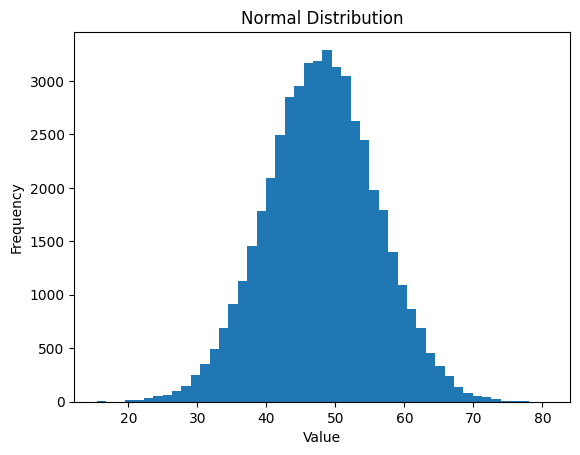

In [15]:
#Normal Distribution
norMean = roll 
norStd = roll/6
norSamples = roll*1000
norData = np.random.normal(norMean, norStd, norSamples)
plot(norData, roll, 'Normal Distribution', 'Value', 'Frequency')

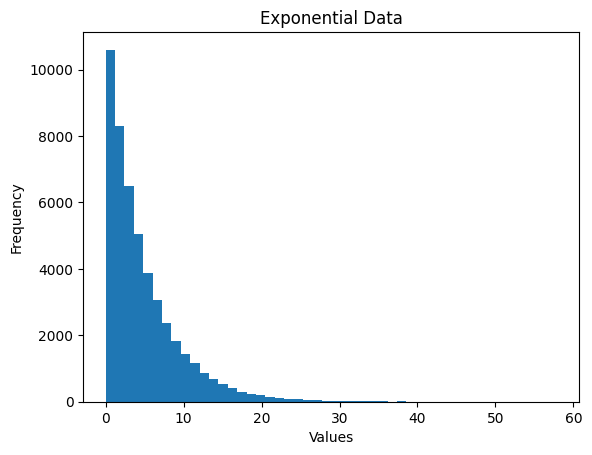

In [ ]:
#Exponential Distribution
scale_exp = roll/10
expData = np.random.exponential(scale=scale_exp, size=roll*1000)
plot(expData, roll, title='Exponential Data', x_label='Values', y_label='Frequency')

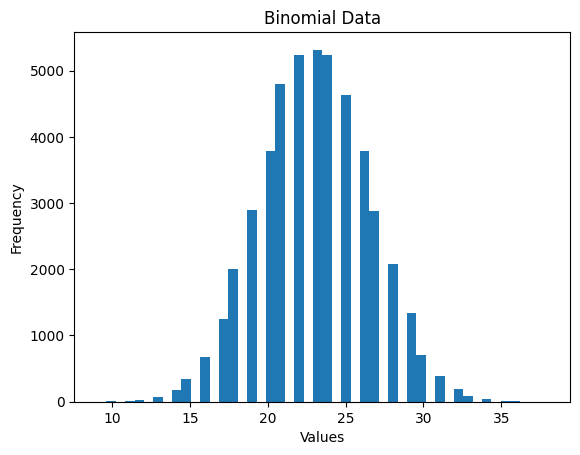

In [21]:
#Binomial Distribution
binData = np.random.binomial(roll, roll/100, roll*1000)
plot(binData, roll, title='Binomial Data', x_label='Values', y_label='Frequency')

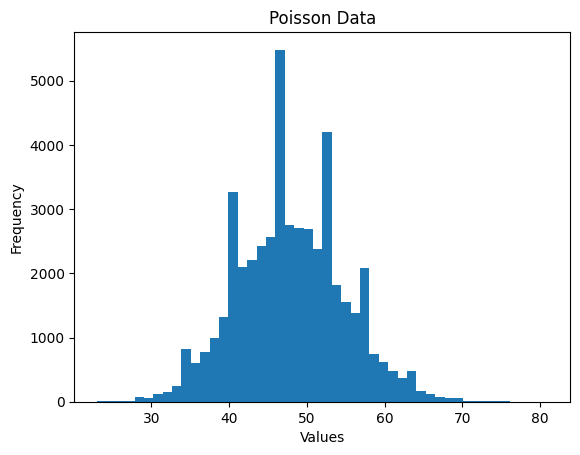

In [22]:
#Poisson Distribution
poissonData = np.random.poisson(roll, roll*1000)
plot(poissonData, roll, title='Poisson Data', x_label='Values', y_label='Frequency')

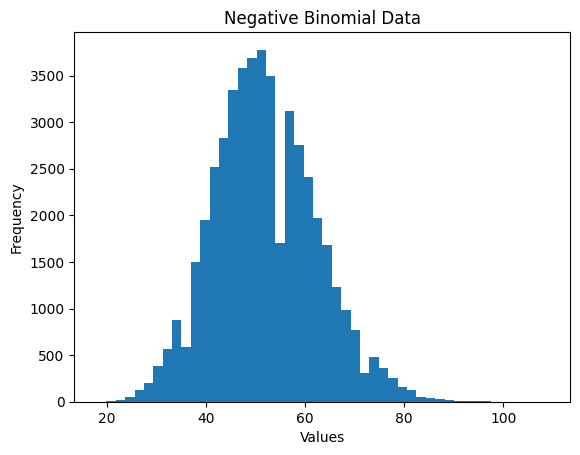

In [23]:
#Negative Binomial Distribution
negBinData = np.random.negative_binomial(roll, roll/100, roll*1000)
plot(negBinData, roll, title='Negative Binomial Data', x_label='Values', y_label='Frequency')

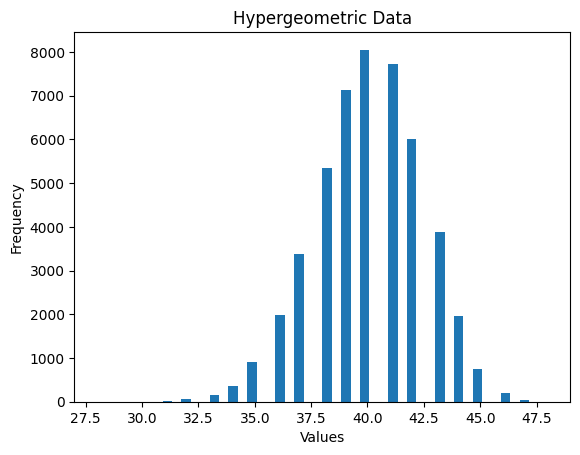

In [25]:
#Hypergeometric Distribution
hyperData = np.random.hypergeometric(roll*5, roll, roll, roll*1000)
plot(hyperData, roll, title='Hypergeometric Data', x_label='Values', y_label='Frequency')

2. View Central Limit Theorem (CLT) in action for standard distributions: For each
probability distribution listed above plot the probability distribution (histogram plot)
for random sample means created from that distribution increasing sample size in
steps from 10 to 100. Show in single figure the CLT plot for each distribution using
subplots. {
Hint: For example to calculate mean sample means using exponential distribution
you may do;
sample_means = [np.mean(np.random.exponential(scale=2.0, size=sample_size))
for _ in range(num_samples)]
You can explore ‘kde plot’ using ‘seaborn’ library for a continuous looking
distribution plot
}

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
def clt(func, params, title = 'Nayan Khusu', sample_sizes = [10, 20, 30, 40], num_samples=500):
    plt.figure()
    for i, sample_size in enumerate(sample_sizes):
        sample_mean = [np.mean(func(*params, size=sample_sizes)) for _ in range (num_samples)]
        sns.kdeplot(sample_mean, fill=True, alpha=0.6, label=f'Sample Size = {sample_size}')
    plt.title(title)
    plt.xlabel('Sample Mean')
    plt.ylabel('Density')

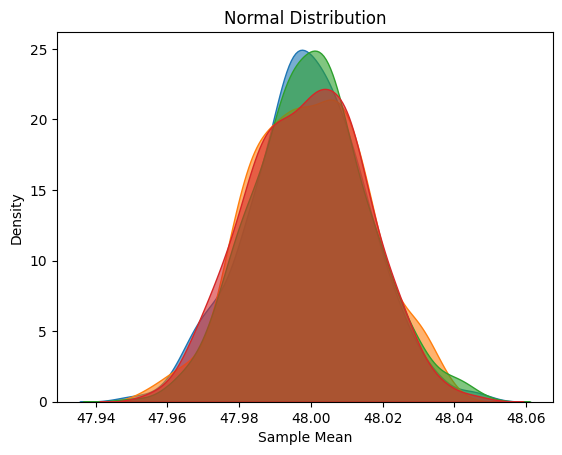

In [39]:
#Normal Distribution
sample_sizes = [10, 20, 30, 40]
roll = 48
clt(np.random.normal, (roll, roll/6), 'Normal Distribution', sample_sizes)

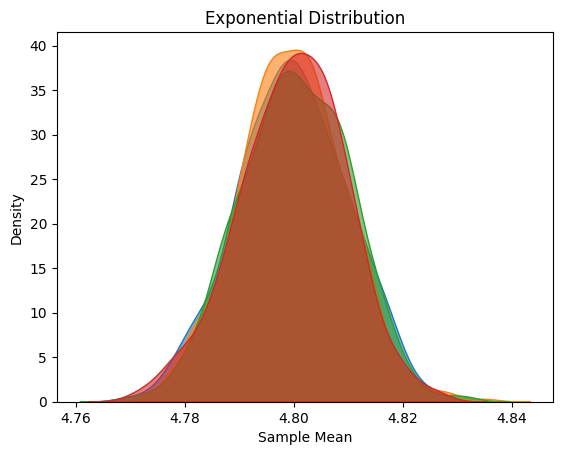

In [40]:
#Exponential Distribution
clt(np.random.exponential, (roll/10,), 'Exponential Distribution', sample_sizes)

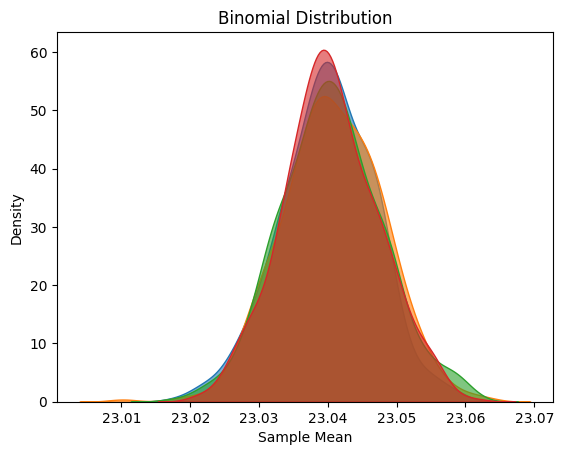

In [41]:
#Binomial Distribution
clt(np.random.binomial, (roll, roll/100), 'Binomial Distribution', sample_sizes)

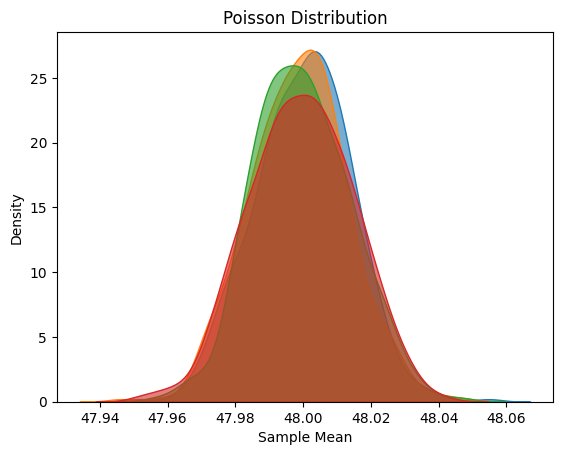

In [42]:
#Poisson Distribution
clt(np.random.poisson, (roll,), 'Poisson Distribution', sample_sizes)

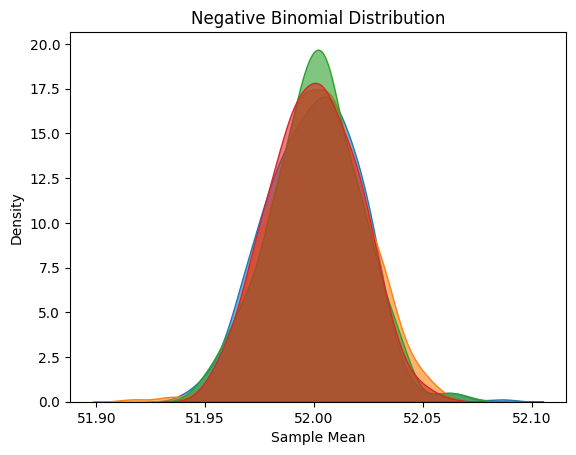

In [43]:
#Negative Binomial Distribution
clt(np.random.negative_binomial, (roll, roll/100), 'Negative Binomial Distribution', sample_sizes)

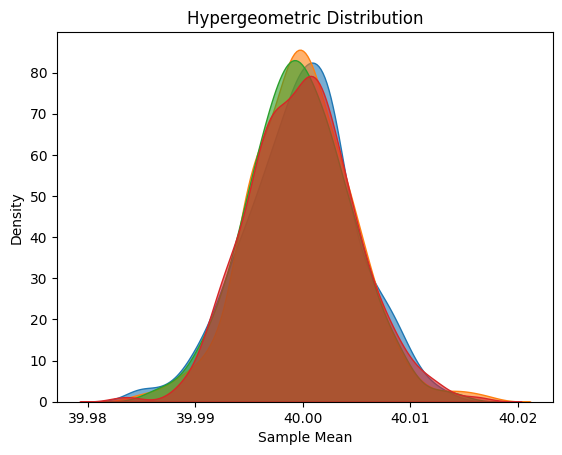

In [44]:
#Hypergeometric Distribution
clt(np.random.hypergeometric, (roll*5, roll, roll), 'Hypergeometric Distribution', sample_sizes)

3. View Central Limit Theorem (CLT) in action for a dataset: Download the dataset
provided along with this assignment (or visit the site Student Performance
Dataset: Academic Insights 10K) which consists of data on various
demographics and score in different subjects for about 10000 students. For the
columns “math_score”, “reading_score”, “writing_score”, “science_score” and
“total_score”, plot data distribution (histograms) for each and then for random
sample means created from each of these data distribution (CLT) increasing sample
size in steps from 10 to 100.

{
Hint: While you load data using pandas you will notice some null values for these
column and in particular the column “math_score” will have string datatype
because of presence of some tab characters along with numbers, clean this data
into numeric format consisting only of digits for example using
pandas.Series.str.replace(r'[^\d]', '', regex=True) and then convert to numeric and
remove/replace null values before proceeding. You can generate sample means for each column data using the function below:
def generate_sample_means(data, sample_size, num_samples):
generated_samples = np.zeros(num_samples)
for i in range(num_samples):

sample = np.random.choice(data, size=sample_size, replace=True, p=None)

generated_samples[i] = np.mean(sample)
return generated_samples

}

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
st = pd.read_csv('Student_performance_10k.csv')
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   roll_no                      9999 non-null   object 
 1   gender                       9982 non-null   object 
 2   race_ethnicity               9977 non-null   object 
 3   parental_level_of_education  9978 non-null   object 
 4   lunch                        9976 non-null   float64
 5   test_preparation_course      9977 non-null   float64
 6   math_score                   9976 non-null   object 
 7   reading_score                9975 non-null   float64
 8   writing_score                9976 non-null   float64
 9   science_score                9977 non-null   float64
 10  total_score                  9981 non-null   float64
 11  grade                        9997 non-null   object 
dtypes: float64(6), object(6)
memory usage: 937.6+ KB


In [119]:
columns_to_clean = ['math_score', 'reading_score', 'writing_score', 
'science_score', 'total_score']
for col in columns_to_clean:
    st[col] = pd.to_numeric(st[col].replace(r'[^\d]', '', regex=True), errors='coerce')
    st[col] = st[col].fillna(st[col].mean())

In [63]:
sample_sizes = range(10, 101, 10)
num_sample = 1000

In [64]:
def sample_mean(data, sample_size, num_sample):
    generated_samples = np.zeros(num_sample)
    for i in range(sample_size):
        sample = np.random.choice(data, size=sample_size, replace=True)
        generated_samples[i] = np.mean(sample)
    return generated_samples

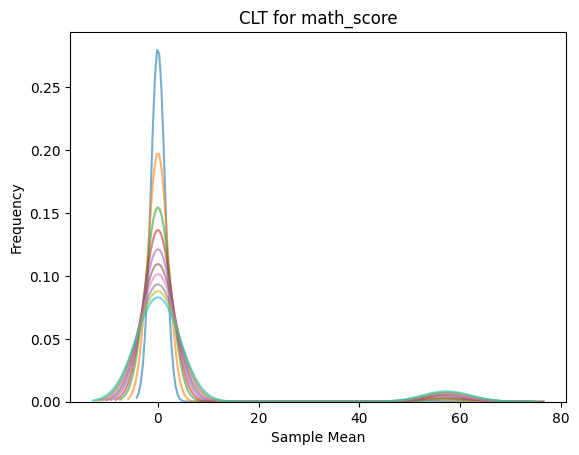

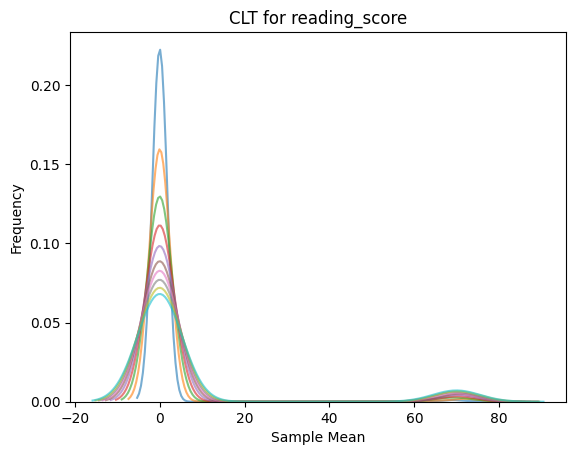

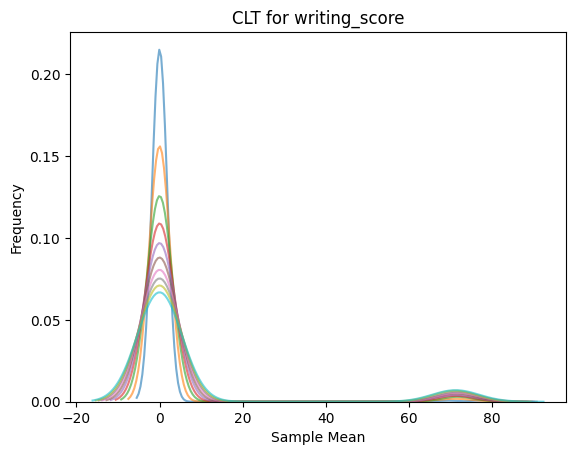

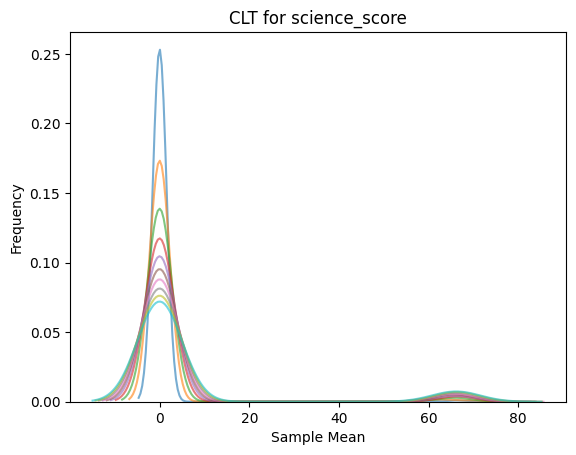

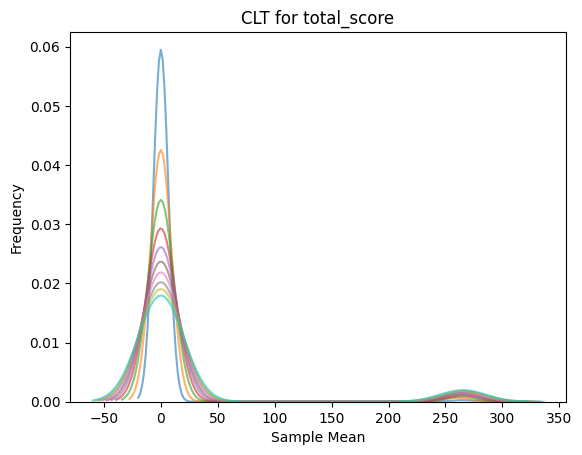

In [72]:
for Nayan, col in enumerate(columns_to_clean):
    plt.figure()
    for sample_size in sample_sizes:
        sample_means = sample_mean(st[col].values, sample_size, num_sample)
        sns.kdeplot(sample_means, alpha=0.6)
        plt.title(f"CLT for {col}")
        plt.xlabel("Sample Mean")
        plt.ylabel("Frequency")
    plt.show()

4. Visualization plots: Using the same dataset from above;
I. Show box plots and correlation matrix for columns “math_score”, “reading_score”, “writing_score”, “science_score” and “total_score”. II. Find mean “total_score” for each groups “gender” and “race_ethnicity” and plot a bar graph. III. Plot a scatter-plot between “math_score” and “science_score” and comment on
the relationship that you get. IV. Show the distribution of “level_of_education”, “race_ethnicity” and “gender” in a
pie chart. V. Plot a heatmap to see missing values for some column of your choice

In [111]:

st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   roll_no                      9999 non-null   object 
 1   gender                       9982 non-null   object 
 2   race_ethnicity               9977 non-null   object 
 3   parental_level_of_education  9978 non-null   object 
 4   lunch                        9976 non-null   float64
 5   test_preparation_course      9977 non-null   float64
 6   math_score                   9976 non-null   object 
 7   reading_score                9975 non-null   float64
 8   writing_score                9976 non-null   float64
 9   science_score                9977 non-null   float64
 10  total_score                  9981 non-null   float64
 11  grade                        9997 non-null   object 
dtypes: float64(6), object(6)
memory usage: 937.6+ KB


In [112]:
st.head()

,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
0,std-01,male,group D,some college,1.0,1.0,89,38.0,85.0,26.0,238.0,C
1,std-02,male,group B,high school,1.0,0.0,65,100.0,67.0,96.0,328.0,A
2,std-03,male,group C,master's degree,1.0,0.0,10,99.0,97.0,58.0,264.0,B
3,std-04,male,group D,some college,1.0,1.0,22,51.0,41.0,84.0,198.0,D
4,std-05,male,group C,some college,0.0,1.0,26,58.0,64.0,65.0,213.0,C


In [113]:
st.drop(['roll_no','gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'grade'], axis=1, inplace=True)

In [114]:
st.head()

,math_score,reading_score,writing_score,science_score,total_score
0,89,38.0,85.0,26.0,238.0
1,65,100.0,67.0,96.0,328.0
2,10,99.0,97.0,58.0,264.0
3,22,51.0,41.0,84.0,198.0
4,26,58.0,64.0,65.0,213.0


Text(0.5, 1.0, 'Box Plot')

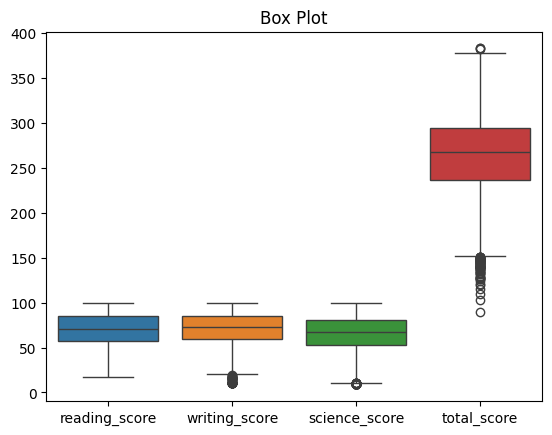

In [115]:
sns.boxplot(st)
plt.title("Box Plot")

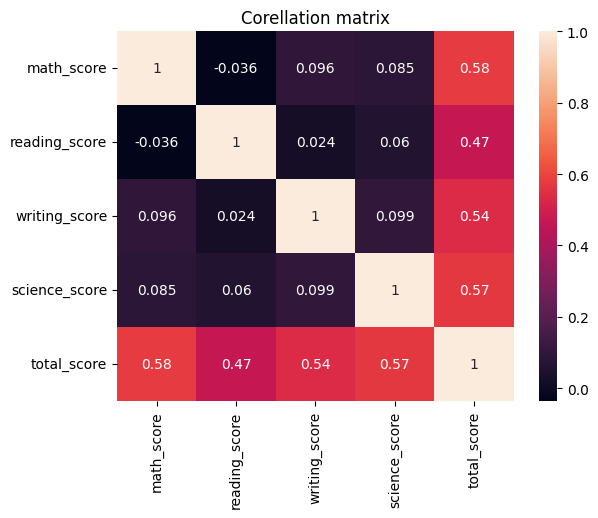

In [120]:
stCorr = st.corr()
sns.heatmap(stCorr, annot=True)
plt.title("Corellation matrix")
plt.show()


In [102]:
st1 = pd.read_csv('Student_performance_10k.csv')

In [103]:
st1['gender'].unique()

array(['male', nan, 'Boy', '\\tmale', 'female', 'Girl'], dtype=object)

In [104]:
st1['race_ethnicity'].unique()

array(['group D', 'group B', 'group C', 'group E', 'group A', 'A', nan,
       'C', 'D', 'group C\\n', 'B', 'E'], dtype=object)

In [106]:
st1['gender'] = st1['gender'].str.strip().str.lower()
st1['gender'] = st1['gender'].replace({'male': 'M', 'female': 'F', 'girl': 'F', 'boy': 'M', 'm': 'M', 'f': 'F'})  
st1 = st1[st1['gender'].isin(['M', 'F'])]

In [107]:
st1['race_ethnicity'] = st1['race_ethnicity'].str.strip().str.lower()
st1['race_ethnicity'] = st1['race_ethnicity'].replace({'a': 'group A', 'b': 'group A', 'c': 'group C', 'd': 'group D', 'e': 'group E', 'group C\n': 'group C'})
st1=st1[st1['race_ethnicity'].isin(['group a', 'group b', 'group c', 'group d', 'group e'])]

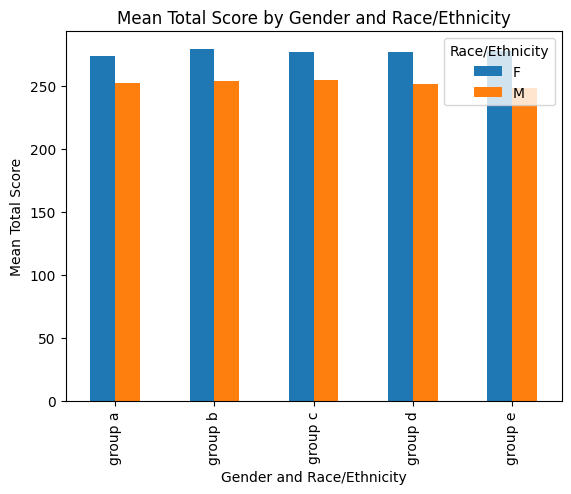

In [108]:
grouped_means = st1.groupby([ 'race_ethnicity', 'gender'])['total_score'].mean().unstack()
grouped_means.plot(kind='bar', stacked=False)
plt.title('Mean Total Score by Gender and Race/Ethnicity')
plt.xlabel('Gender and Race/Ethnicity')
plt.ylabel('Mean Total Score')
plt.legend(title='Race/Ethnicity')
plt.show()

<Axes: xlabel='math_score', ylabel='science_score'>

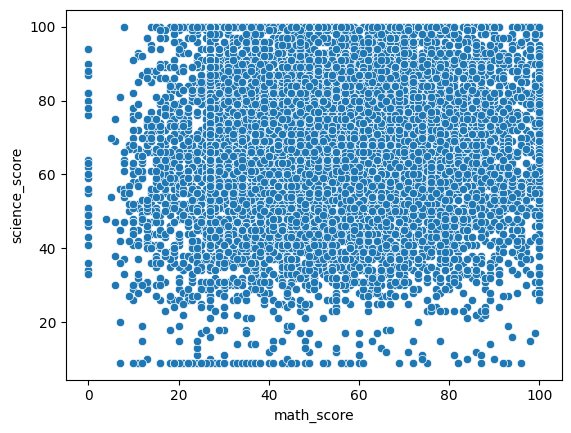

In [121]:
scatter_data = pd.DataFrame({
    'math_score' : st['math_score'],
    'science_score': st['science_score']
})
sns.scatterplot(scatter_data, x='math_score', y='science_score')

In [124]:
education_count = st1['parental_level_of_education'].value_counts()
race_ethnicity = st1['race_ethnicity'].value_counts()
gender = st1['gender'].value_counts()

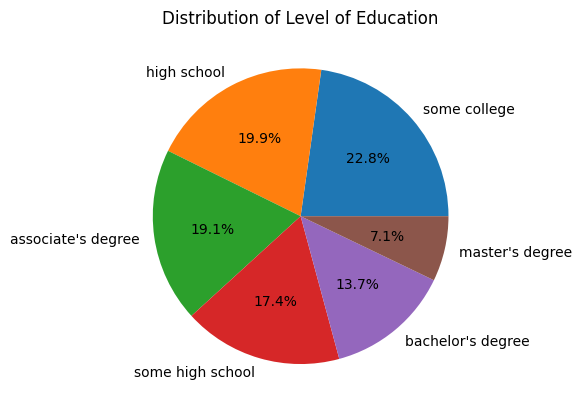

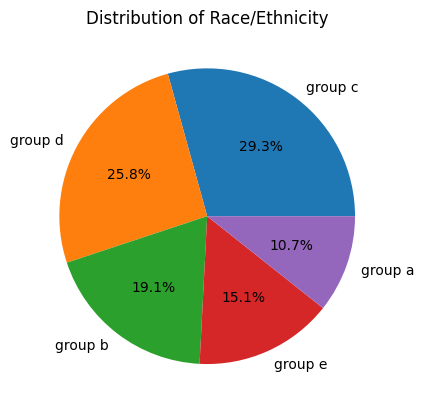

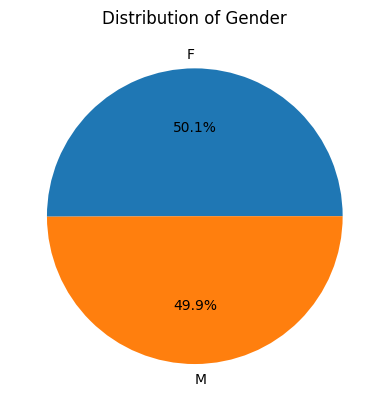

In [133]:
plt.pie(education_count, labels=education_count.index, autopct='%1.1f%%')
plt.title('Distribution of Level of Education')
plt.show()
plt.pie(race_ethnicity, labels=race_ethnicity.index, autopct='%1.1f%%')
plt.title('Distribution of Race/Ethnicity')
plt.show()
plt.pie(gender, labels=gender.index, autopct='%1.1f%%')
plt.title('Distribution of Gender')
plt.show()

<Axes: >

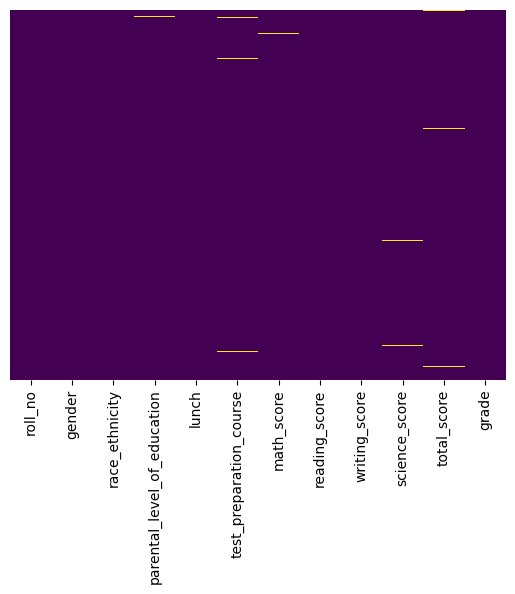

In [136]:
sns.heatmap(st1.isna(), cbar=False, cmap='viridis', xticklabels=st1.columns, yticklabels=False)